In [22]:
import numpy as np
import importlib
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB

import loaddata
importlib.reload(loaddata)
from loaddata import load_data

import data_vis
importlib.reload(data_vis)
from data_vis import mat2graph, plot_graph

import spectral_clustering_tools
importlib.reload(spectral_clustering_tools)
from spectral_clustering_tools import clustering, df2mat

import graph_analysis_tools
importlib.reload(graph_analysis_tools)
from graph_analysis_tools import group_interactions, add_queen

## DATASET 2


In [2]:
metadata, data = load_data('dataset2')

###    Spectral clustering

In [3]:
matrices, ground_truth, list_ants = df2mat(np.arange(1,6), np.arange(1,41), metadata, data)
scores, preds = clustering(matrices, ground_truth, list_ants)
print(np.mean(scores))


C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectra

0.6891027962870457


C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


  ###  Group interactions analysis

In [7]:
col = 1
day = 1

####        Avec les labels de metadata (vérité terrain)

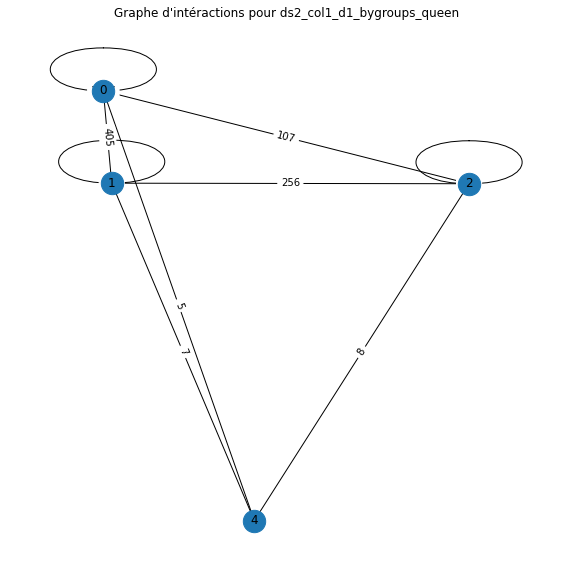

In [74]:
mat, y_true, ants = df2mat([col], [day], metadata, data, queen=True)
graph = mat2graph(mat[0], 'dataset2_col1_d1', plot=False)
graph_gr = group_interactions(graph, y_true[0], ants[0])
plot_graph(graph_gr, f'ds2_col{col}_d{day}_bygroups_queen')


#### Avec les labels prédits

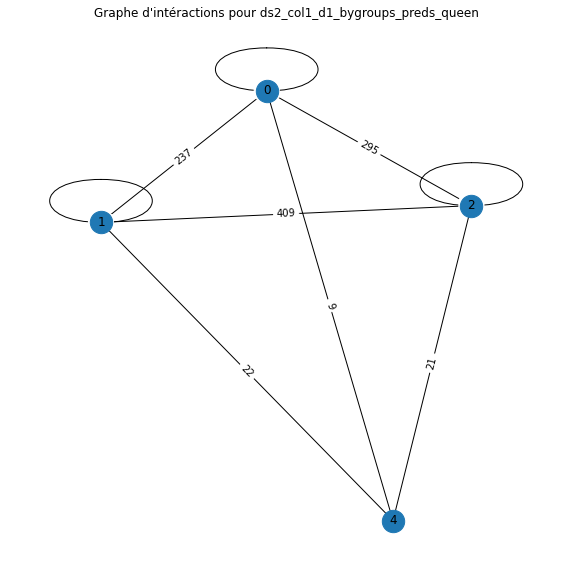

In [75]:
mat, y_true, ants = df2mat([col], [day], metadata, data, queen=False)
mat_queen, pred_queen, ants_queen = add_queen(mat[0], preds[0], ants[0], metadata, col, day, data[col-1][day-1])
if len(mat_queen) != 0:
    graph_pred_queen = mat2graph(mat_queen, f'dataset2_col{col}_d{day}', plot=False)
    graph_gr_pred = group_interactions(graph_pred_queen, pred_queen, ants_queen)
    plot_graph(graph_gr_pred, f'ds2_col{col}_d{day}_bygroups_preds_queen')

## Classification supervisée

In [9]:
period = 1

#### Création train set

In [10]:
metadata_wo_col1 = metadata[metadata['colony_act'] != 1] #on entraine sur les colonies 2 à 6

df_datax_train = pd.DataFrame().assign(nb_foraging_events=metadata_wo_col1["nb_foraging_events"], visits_to_brood=metadata_wo_col1["visits_to_brood"], visits_to_nest_entrance=metadata_wo_col1['visits_to_nest_entrance'], visits_to_rubbishpile=metadata_wo_col1['visits_to_rubbishpile'], nb_interaction_nurses=metadata_wo_col1['nb_interaction_nurses'], nb_interaction_cleaners=metadata_wo_col1['nb_interaction_cleaners'], nb_interaction_foragers=metadata_wo_col1['nb_interaction_foragers'], nb_interactions_queen=metadata_wo_col1['nb_interaction_queen'])
df_datax_train.dropna()

df_datay_train = pd.DataFrame().assign(group_period1=metadata_wo_col1["group_period1"], group_period2=metadata_wo_col1["group_period2"], group_period3=metadata_wo_col1["group_period3"], group_period4=metadata_wo_col1["group_period4"])
df_datay_train.dropna()

datax_train = df_datax_train.to_numpy()

datay_train = df_datay_train[f'group_period{period}'].to_numpy()

#### Création test set

In [11]:
#creation test set
metadata_col1 = metadata[metadata['colony_act'] == 1] #on teste sur la colonie 1

df_datax_test = pd.DataFrame().assign(nb_foraging_events=metadata_col1["nb_foraging_events"], visits_to_brood=metadata_col1["visits_to_brood"], visits_to_nest_entrance=metadata_col1['visits_to_nest_entrance'], visits_to_rubbishpile=metadata_col1['visits_to_rubbishpile'], nb_interaction_nurses=metadata_col1['nb_interaction_nurses'], nb_interaction_cleaners=metadata_col1['nb_interaction_cleaners'], nb_interaction_foragers=metadata_col1['nb_interaction_foragers'], nb_interactions_queen=metadata_col1['nb_interaction_queen'])
df_datax_test.dropna()

df_datay_test = pd.DataFrame().assign(group_period1=metadata_col1["group_period1"], group_period2=metadata_col1["group_period2"], group_period3=metadata_col1["group_period3"], group_period4=metadata_col1["group_period4"])
df_datay_test.dropna()

datax_test = df_datax_test.to_numpy()

datay_test = df_datay_test[f'group_period{period}'].to_numpy()

#### K-nearest neighbors

In [17]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(datax_train, datay_train)
yhat_knn = knn_clf.predict(datax_test)
score_knn = accuracy_score(datay_test, yhat_knn)
score_details_knn = precision_recall_fscore_support(datay_test, yhat_knn)

C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(score_knn)
print(score_details_knn)

0.8272727272727273
(array([0.70967742, 0.85483871, 0.94117647, 0.        ]), array([0.70967742, 1.        , 0.64      , 0.        ]), array([0.70967742, 0.92173913, 0.76190476, 0.        ]), array([31, 53, 25,  1], dtype=int64))


#### Decision Tree

In [19]:
dc_clf = DecisionTreeClassifier()
dc_clf.fit(datax_train, datay_train)
yhat_dc = dc_clf.predict(datax_test)
score_dc = accuracy_score(datay_test, yhat_dc)
scores_details_dc = precision_recall_fscore_support(datay_test, yhat_dc)

In [20]:
print(score_dc)
print(scores_details_dc)

0.6454545454545455
(array([0.41666667, 0.76315789, 0.91304348, 1.        ]), array([0.64516129, 0.54716981, 0.84      , 1.        ]), array([0.50632911, 0.63736264, 0.875     , 1.        ]), array([31, 53, 25,  1], dtype=int64))


#### Naive Bayes

In [23]:
nb_clf = ComplementNB()
nb_clf.fit(datax_train, datay_train)
yhat_nb = nb_clf.predict(datax_test)
score_nb = accuracy_score(datay_test, yhat_nb)
scores_details_nb = precision_recall_fscore_support(datay_test, yhat_nb)

C:\Users\Candice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(score_nb)
print(scores_details_nb)

0.7363636363636363
(array([1.        , 0.76811594, 0.65789474, 0.        ]), array([0.09677419, 1.        , 1.        , 0.        ]), array([0.17647059, 0.86885246, 0.79365079, 0.        ]), array([31, 53, 25,  1], dtype=int64))


## TODO :
   ~~- fonction taux de similarité entre deux groupes pour évaluer le modèle~~
   ~~- interaction entre groupes (agréger les graphes -> 3 ou 4 noeuds (reine ou pas))~~
    - chaîne de markov avec changements de rôles (prédire le comportement d'une fourmi)
    - faire ressortir des indices pour évaluer l'intéraction (pourcentage du nb d'interactions avec chaque groupe, nb moyen d'interactions par fourmi d'un groupe, variance associée, et ??)
 ~~-  classification supervisée (avec attributs de metadata)~~
    - additionner toutes les matrices de comptage du nombre d'intéractions d'une période
    - regarder les modèles de l'article
    - clusteriser avec une marche aléatoire dans les graphes
    - regarder si on peut jouer avec les poids des classes dans le spectral clustering
